In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy import stats

# Load and preprocess the data
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['Acquisition Year'] = pd.to_datetime(df['Acquisition Year'], format='%Y')
    df['Acquisition Price'] = pd.to_numeric(df['Acquisition Price'], errors='coerce')
    return df

# Analyze patterns and correlations
def analyze_patterns(df):
    # Count acquisitions by company
    acquisitions_by_company = df['Parent Company'].value_counts()
    
    # Calculate average acquisition price by year
    avg_price_by_year = df.groupby(df['Acquisition Year'].dt.year)['Acquisition Price'].mean()
    
    # Correlation between year and price
    year_price_corr = df['Acquisition Year'].dt.year.corr(df['Acquisition Price'])
    
    return acquisitions_by_company, avg_price_by_year, year_price_corr

# Compare with historical trends
def compare_historical_trends(df):
    # Calculate 5-year moving average of acquisition prices
    df_sorted = df.sort_values('Acquisition Year')
    df_sorted['5Y_MA'] = df_sorted['Acquisition Price'].rolling(window=5).mean()
    
    # Perform trend analysis
    x = df_sorted['Acquisition Year'].astype(int)
    y = df_sorted['Acquisition Price']
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    return df_sorted, slope, r_value, p_value

# Project findings into multi-dimensional space
def project_multidimensional(df):
    # Select relevant features
    features = ['Acquisition Year', 'Acquisition Price']
    X = df[features]
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    return X_pca, pca.explained_variance_ratio_

# Visualize results
def visualize_results(acquisitions_by_company, avg_price_by_year, X_pca, companies):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))
    
    # Plot acquisitions by company
    acquisitions_by_company.plot(kind='bar', ax=ax1)
    ax1.set_title('Number of Acquisitions by Company')
    ax1.set_xlabel('Company')
    ax1.set_ylabel('Number of Acquisitions')
    
    # Plot average acquisition price by year
    avg_price_by_year.plot(ax=ax2)
    ax2.set_title('Average Acquisition Price by Year')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Average Price')
    
    # Plot PCA results
    scatter = ax3.scatter(X_pca[:, 0], X_pca[:, 1], c=companies.astype('category').cat.codes, cmap='viridis')
    ax3.set_title('PCA of Acquisitions')
    ax3.set_xlabel('First Principal Component')
    ax3.set_ylabel('Second Principal Component')
    plt.colorbar(scatter, ax=ax3, label='Company')
    
    plt.tight_layout()
    plt.show()

# Main function
def main():
    # Load data
    df = load_data('acquisition_data.csv')
    
    # Analyze patterns and correlations
    acquisitions_by_company, avg_price_by_year, year_price_corr = analyze_patterns(df)
    print(f"Correlation between year and price: {year_price_corr}")
    
    # Compare with historical trends
    df_sorted, slope, r_value, p_value = compare_historical_trends(df)
    print(f"Trend analysis - Slope: {slope}, R-value: {r_value}, P-value: {p_value}")
    
    # Project findings into multi-dimensional space
    X_pca, explained_variance_ratio = project_multidimensional(df)
    print(f"Explained variance ratio: {explained_variance_ratio}")
    
    # Visualize results
    visualize_results(acquisitions_by_company, avg_price_by_year, X_pca, df['Parent Company'])

if __name__ == "__main__":
    main()

ValueError: time data "-" doesn't match format "%Y", at position 37. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Correlation between year and price: 0.12392530671367867
Trend analysis - Slope: 2.8262576986698495e-09, R-value: 0.12392160085908273, P-value: 0.01592497553471643
Explained variance ratio: [0.5619608 0.4380392]


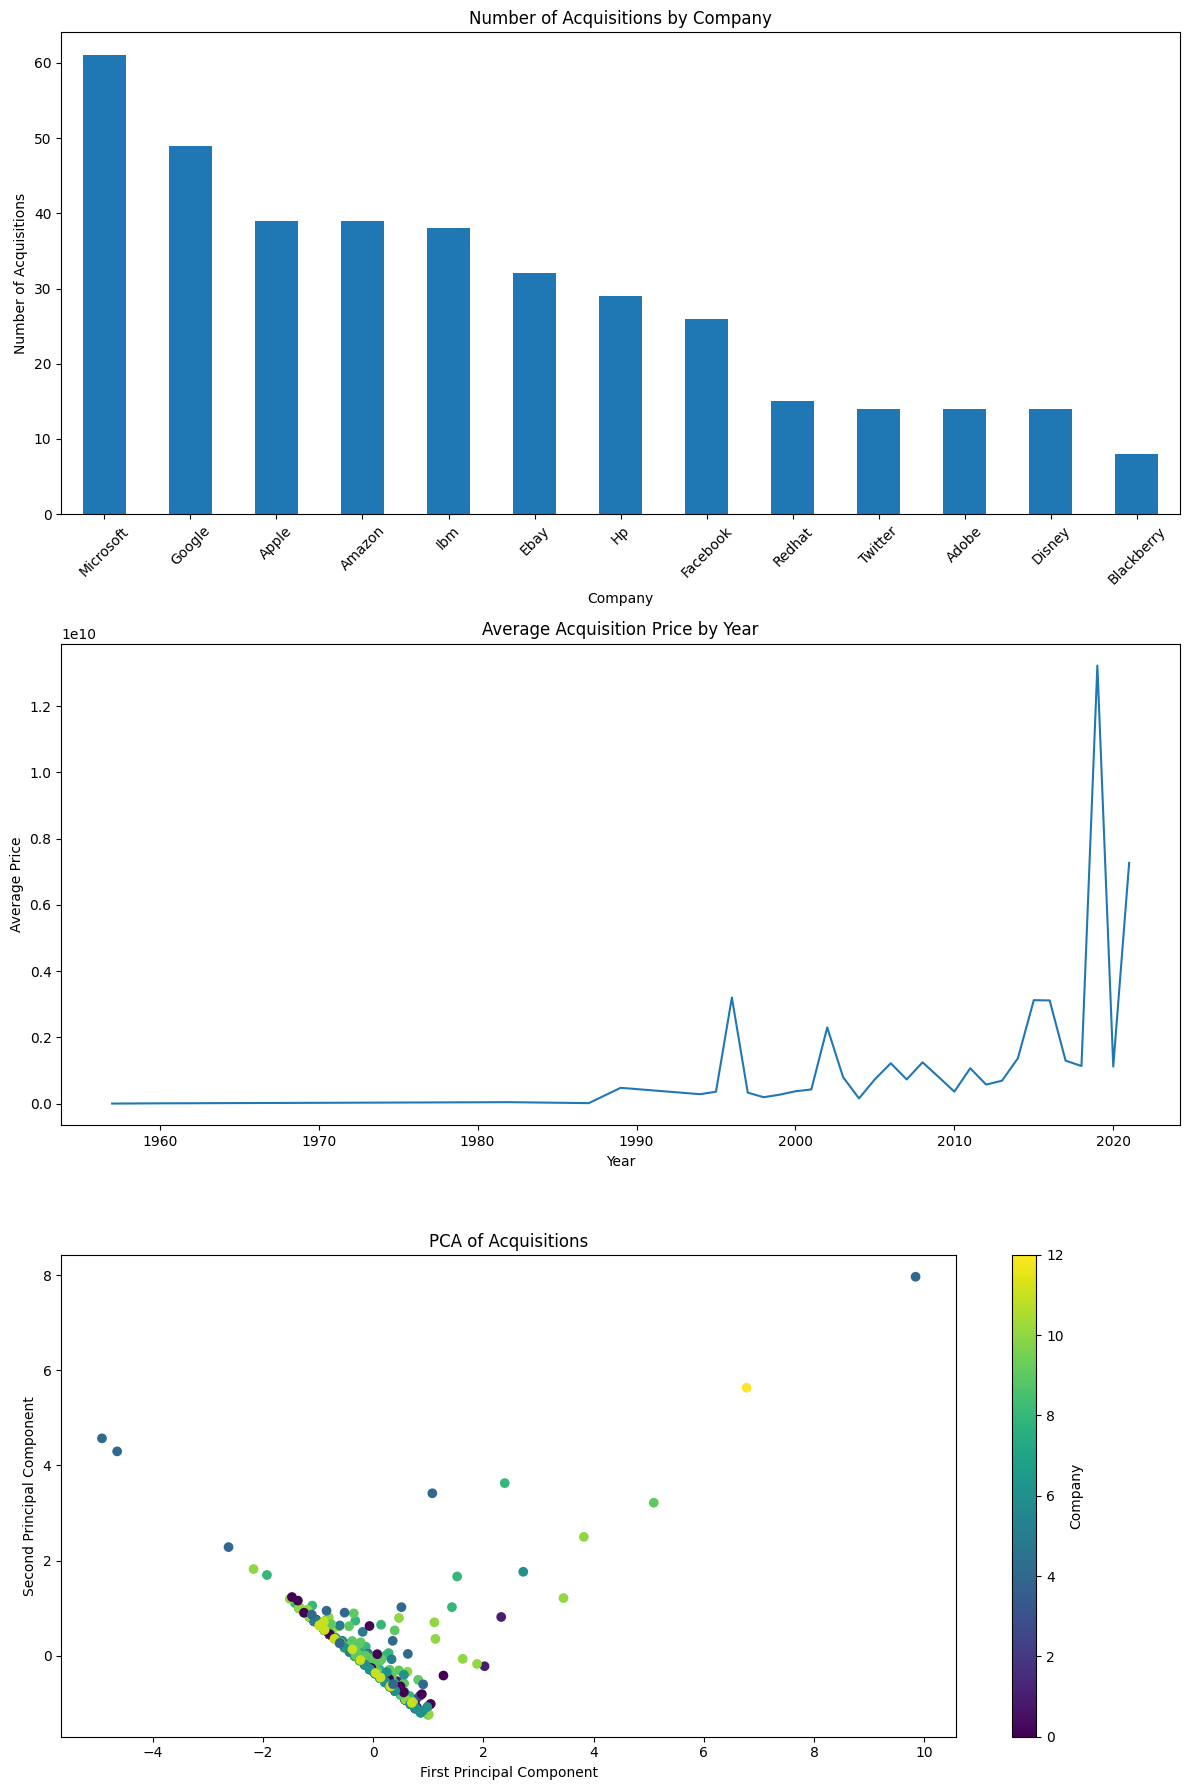

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy import stats

# Load and preprocess the data
def load_data(file_path):
    df = pd.read_csv(file_path)
    
    # Convert Acquisition Year to datetime, handling errors
    df['Acquisition Year'] = pd.to_datetime(df['Acquisition Year'], format='%Y', errors='coerce')
    
    # Convert Acquisition Price to numeric, handling errors
    df['Acquisition Price'] = pd.to_numeric(df['Acquisition Price'].replace({'-': np.nan, '': np.nan}), errors='coerce')
    
    # Drop rows with missing Acquisition Year or Price
    df = df.dropna(subset=['Acquisition Year', 'Acquisition Price'])
    
    return df

# Analyze patterns and correlations
def analyze_patterns(df):
    # Count acquisitions by company
    acquisitions_by_company = df['Parent Company'].value_counts()
    
    # Calculate average acquisition price by year
    avg_price_by_year = df.groupby(df['Acquisition Year'].dt.year)['Acquisition Price'].mean()
    
    # Correlation between year and price
    year_price_corr = df['Acquisition Year'].dt.year.astype(float).corr(df['Acquisition Price'])
    
    return acquisitions_by_company, avg_price_by_year, year_price_corr

# Compare with historical trends
def compare_historical_trends(df):
    # Calculate 5-year moving average of acquisition prices
    df_sorted = df.sort_values('Acquisition Year')
    df_sorted['5Y_MA'] = df_sorted['Acquisition Price'].rolling(window=5).mean()
    
    # Perform trend analysis
    x = df_sorted['Acquisition Year'].astype(int).astype(float)
    y = df_sorted['Acquisition Price']
    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    
    return df_sorted, slope, r_value, p_value

# Project findings into multi-dimensional space
def project_multidimensional(df):
    # Select relevant features
    features = ['Acquisition Year', 'Acquisition Price']
    X = df[features].copy()
    X['Acquisition Year'] = X['Acquisition Year'].astype(int).astype(float)
    
    # Standardize the features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    return X_pca, pca.explained_variance_ratio_

# Visualize results
def visualize_results(acquisitions_by_company, avg_price_by_year, X_pca, companies):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))
    
    # Plot acquisitions by company
    acquisitions_by_company.plot(kind='bar', ax=ax1)
    ax1.set_title('Number of Acquisitions by Company')
    ax1.set_xlabel('Company')
    ax1.set_ylabel('Number of Acquisitions')
    ax1.tick_params(axis='x', rotation=45)
    
    # Plot average acquisition price by year
    avg_price_by_year.plot(ax=ax2)
    ax2.set_title('Average Acquisition Price by Year')
    ax2.set_xlabel('Year')
    ax2.set_ylabel('Average Price')
    
    # Plot PCA results
    scatter = ax3.scatter(X_pca[:, 0], X_pca[:, 1], c=companies.astype('category').cat.codes, cmap='viridis')
    ax3.set_title('PCA of Acquisitions')
    ax3.set_xlabel('First Principal Component')
    ax3.set_ylabel('Second Principal Component')
    plt.colorbar(scatter, ax=ax3, label='Company')
    
    plt.tight_layout()
    plt.show()

# Main function
def main():
    # Load data
    df = load_data('acquisition_data.csv')
    
    # Analyze patterns and correlations
    acquisitions_by_company, avg_price_by_year, year_price_corr = analyze_patterns(df)
    print(f"Correlation between year and price: {year_price_corr}")
    
    # Compare with historical trends
    df_sorted, slope, r_value, p_value = compare_historical_trends(df)
    print(f"Trend analysis - Slope: {slope}, R-value: {r_value}, P-value: {p_value}")
    
    # Project findings into multi-dimensional space
    X_pca, explained_variance_ratio = project_multidimensional(df)
    print(f"Explained variance ratio: {explained_variance_ratio}")
    
    # Visualize results
    visualize_results(acquisitions_by_company, avg_price_by_year, X_pca, df['Parent Company'])

if __name__ == "__main__":
    main()